# Project on predicting customer churn from a bank.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')

# 1. Exploring the data

* Used the describe function to get overall statistics on the data.
* Checked for duplicate records - made sure there were none.
* Cleaned the data of unnecessary columns such as customer ID, Surname, RowNumber.


In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['CustomerId','Surname','RowNumber'], axis=1, inplace=True)


# 2. Analyzing distributions


* Constructed a pie plot to visualize the distribution of data by country.
* Analyzed the distribution of client churn by age.
* Checked class balance (clients who left and clients who stayed).
d).

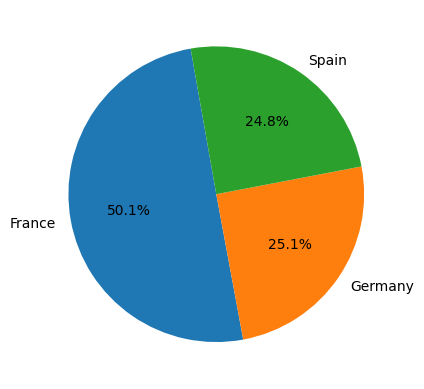

In [8]:
geography = df['Geography'].value_counts()

plt.pie(geography,labels=geography.index, autopct='%1.1f%%', startangle=100)
plt.show()

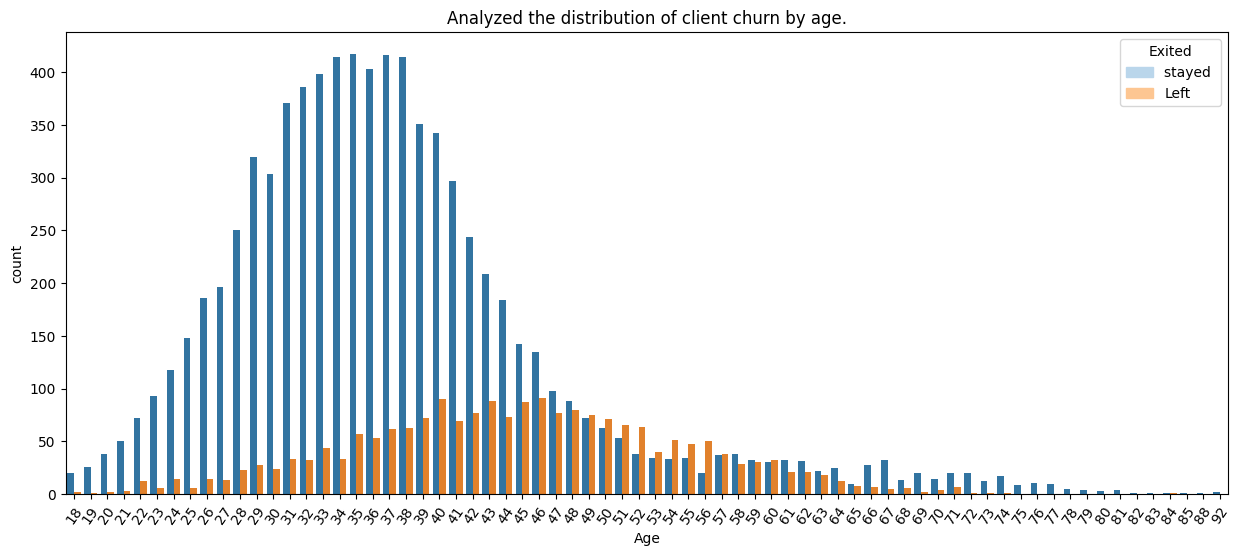

In [102]:
import matplotlib.patches as mpatches
plt.figure(figsize=(15,6))
sns.countplot(df,x = 'Age', hue = 'Exited')
plt.title("Analyzed the distribution of client churn by age.")
plt.xticks(rotation=55)
legend_labels = [mpatches.Patch(color=sns.color_palette("Blues")[1], label='stayed '),
                 mpatches.Patch(color=sns.color_palette("Oranges")[1], label='Left')]

plt.legend(handles=legend_labels, title="Exited", loc="upper right")
plt.show()

Text(0.5, 1.0, 'class balance (clients who left and clients who stayed)')

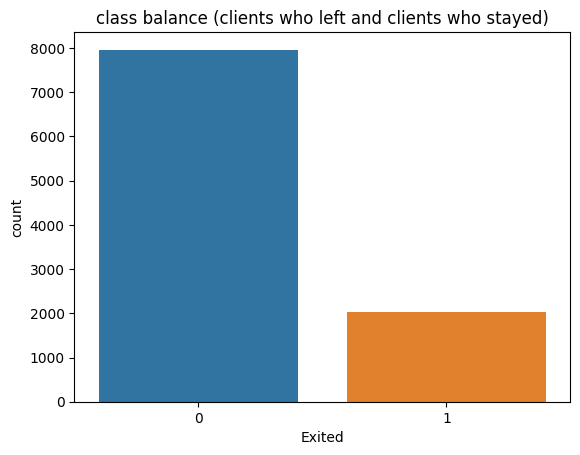

In [103]:
sns.countplot(df, x = 'Exited')
plt.title("class balance (clients who left and clients who stayed)")

# 3. Data transformation
* Converted categorical variables to numeric variables using get_dummies.
* Conducted correlation analysis to determine the relationship between the attributes and the target variable.
* Identified the top 5 attributes that are most correlated with the target variable.
n).

In [9]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

<Axes: >

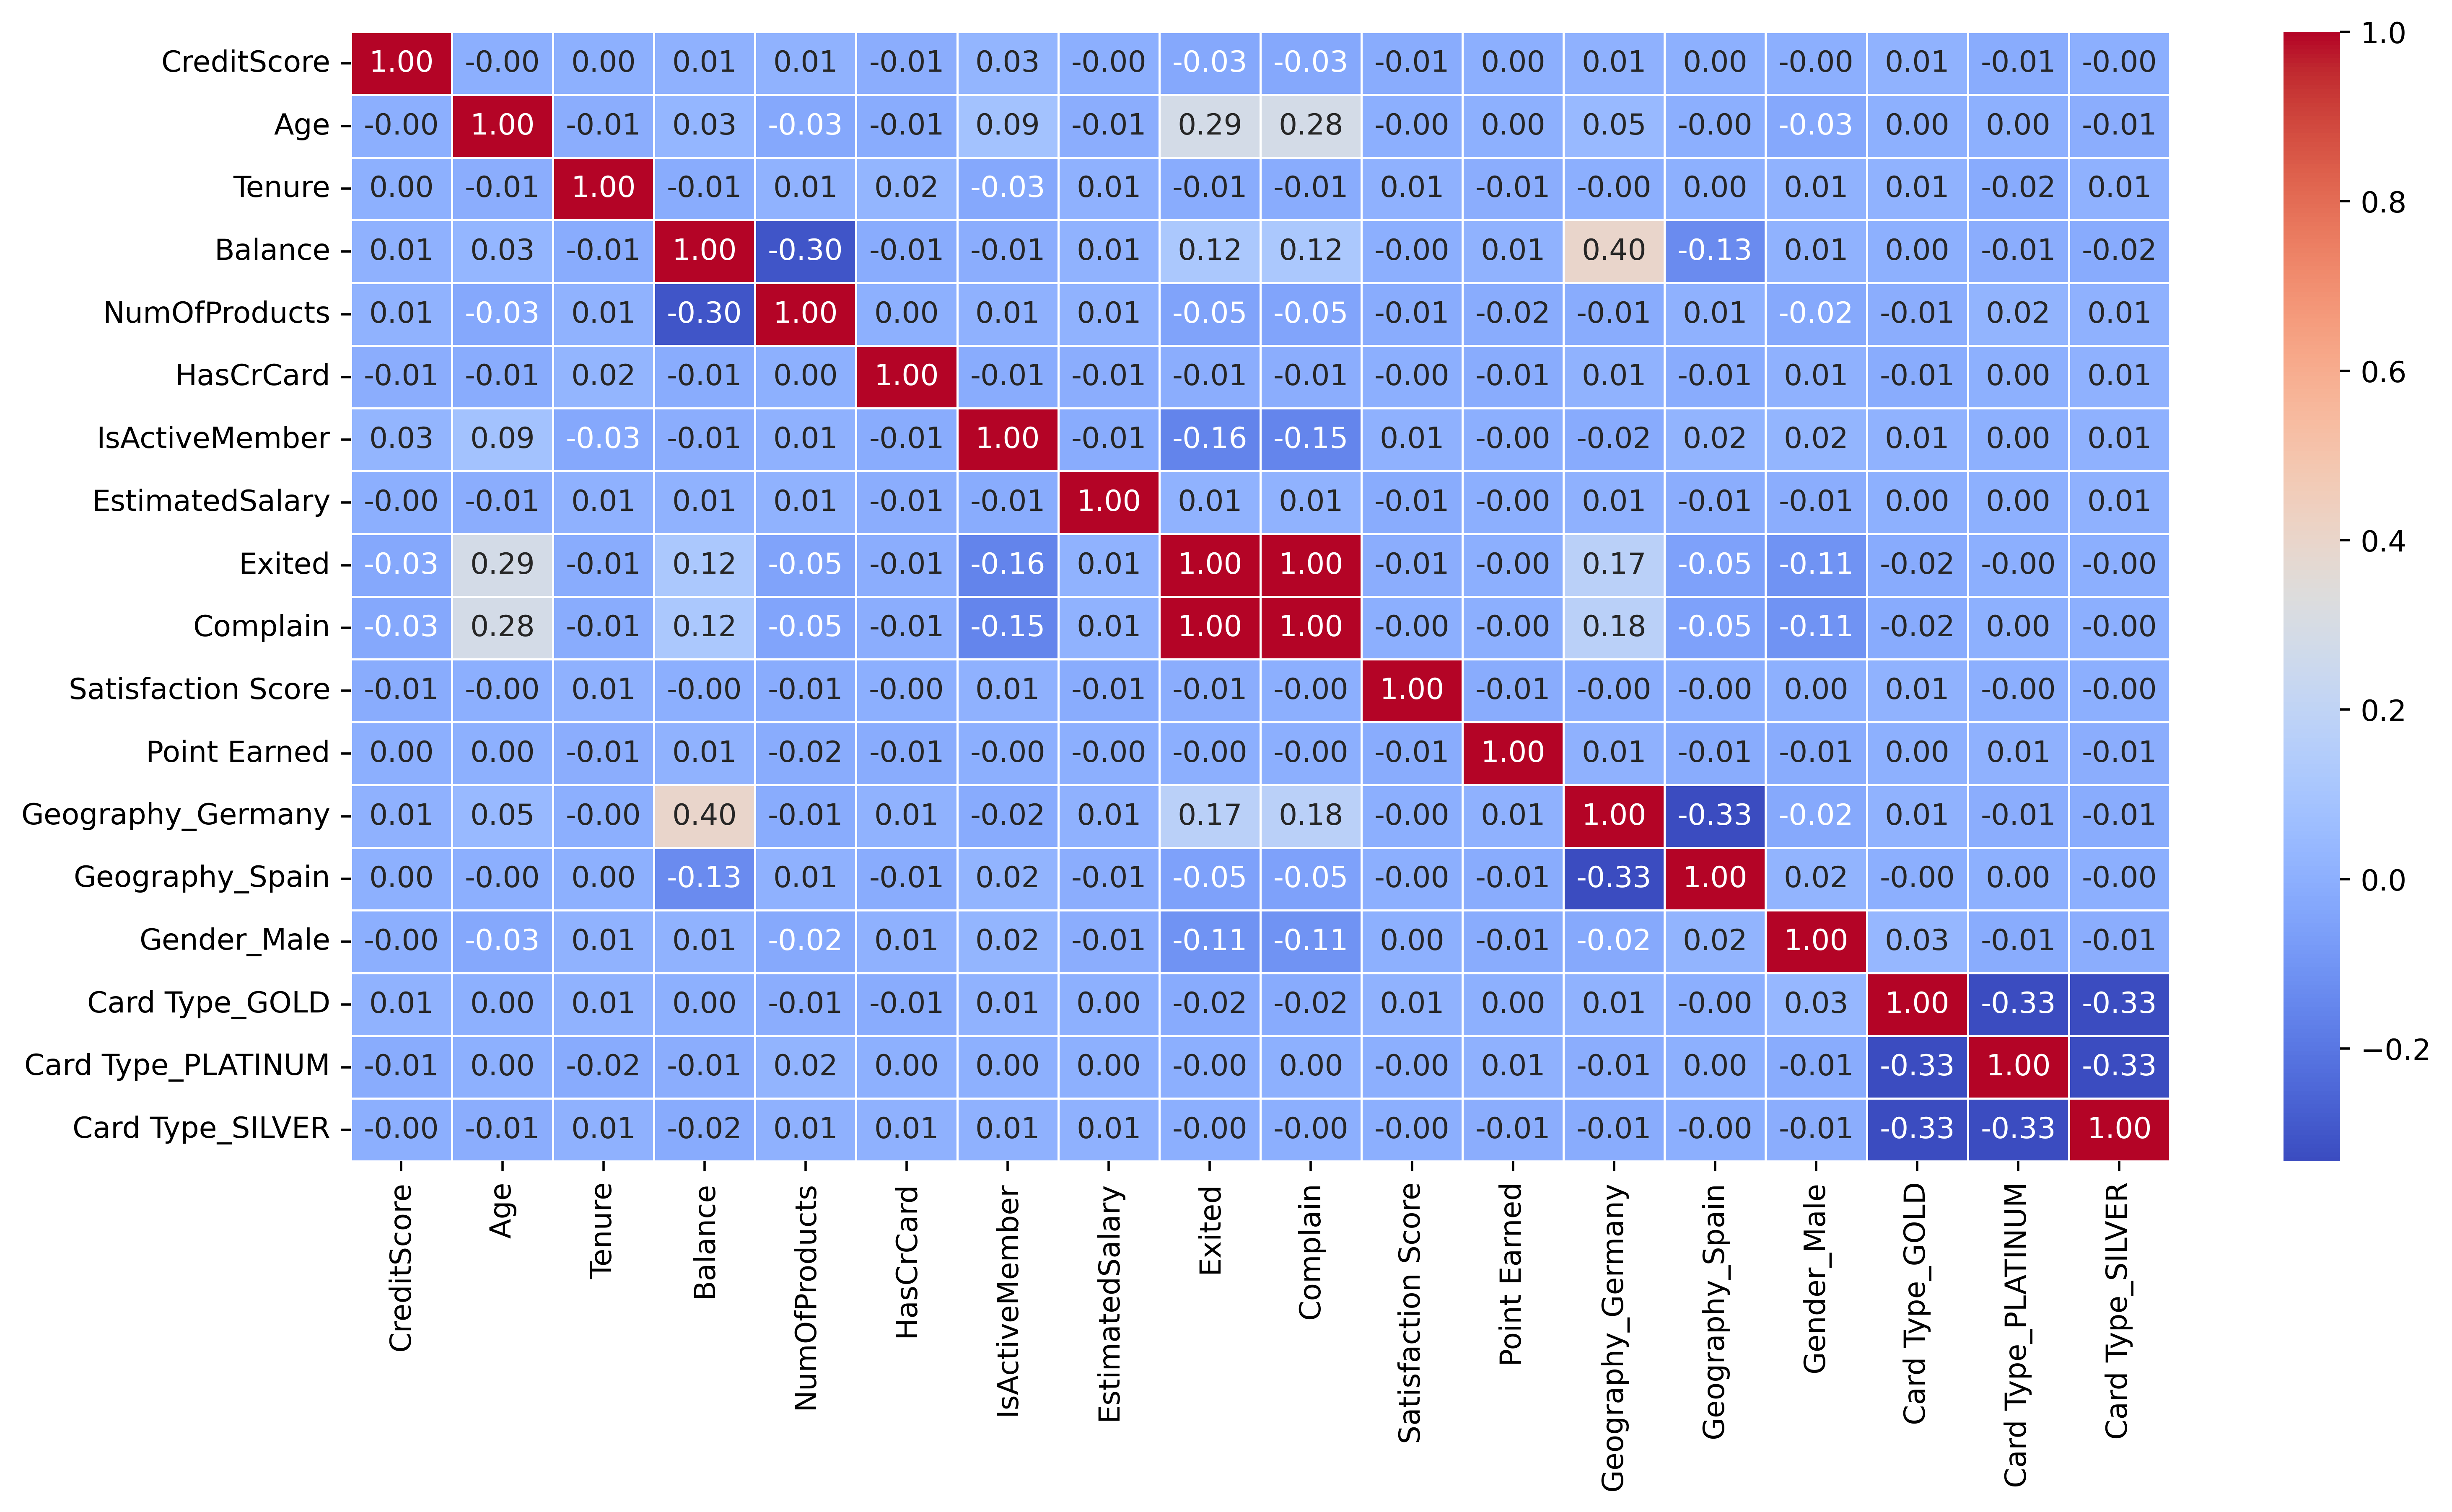

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(14, 7), dpi=500)
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [36]:
corr = df.corr()['Exited']
corr.sort_values(ascending=False)[1:6]

Complain             0.995693
Age                  0.285296
Geography_Germany    0.173313
Balance              0.118577
EstimatedSalary      0.012490
Name: Exited, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# 4. Preparing data for the model

* Split the data into traits (X) and target variable (Y).
* Split the sample into training and test samples using train_test_split.


In [87]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=True)

# 5. Building and customizing the model
* I created the GradientBoostingClassifier model.
* Defined parameters for customization.
mple.

In [43]:
gbc = GradientBoostingClassifier(random_state=42)

In [46]:
param_grid = {
    'n_estimators': range(50, 250, 50),
    'learning_rate': [0.001, 0.005, 0.01, 0.02], 
    'max_depth': range(3, 15, 2),
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}

# 6. Hyperparameter selection
* I applied RandomizedSearchCV for fast parameter selection.
* Set the number of iterations n_iter=100.
* Used the accuracy metric to estimate the model.
* Specified cross validation for 5 folds (cv=5) and enabled all processors for speedup (n_jobs=-1).
-1).

In [58]:
grid = RandomizedSearchCV(gbc,
                    param_grid,
                    cv=5,  
                    scoring='accuracy',  
                    n_iter=100,
                    n_jobs=-1 
                   )

In [59]:
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.02],
                                        'max_depth': range(3, 15, 2),
                                        'n_estimators': range(50, 250, 50),
                                        'subsample': [0.2, 0.3, 0.4, 0.5, 0.6,
                                                      0.7]},
                   scoring='accuracy')

# 7. Model evaluation
* Trained the model with optimal parameters.
* Tested the model on a test sample.
* Constructed a confusion matrix to analyze the quality of prediction.
* Analyzed metrics and results on all data. ata.

In [68]:
best_model = grid.best_estimator_

In [69]:
best_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           random_state=42, subsample=0.2)

In [89]:
pred = best_model.predict(X_test)

In [91]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2609
           1       1.00      1.00      1.00       691

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



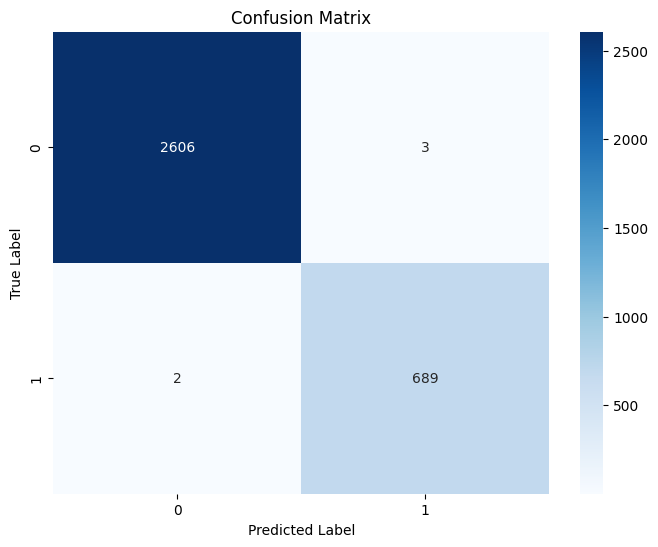

In [93]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [94]:
all_pred = best_model.predict(X)

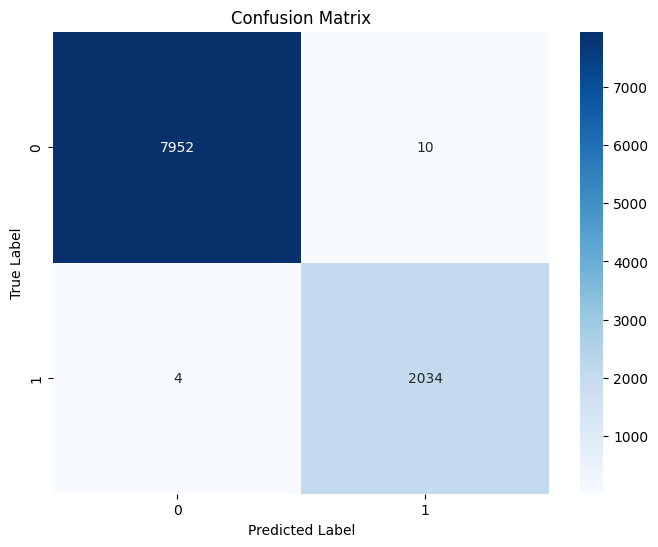

In [95]:
cm = confusion_matrix(y,all_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 8. Results and Conclusions
* Based on the analysis and hyperparameter selection, the **GradientBoostingClassifier** model performed well on the test data.
* The model was successful in predicting customer churn, demonstrating high accuracy and the ability to recognize key attributes associated with churn.
* The built confusion matrix showed that the model classifies customers well, making it useful for predicting potential churn and further analysis.
is.